In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier 
from catboost import CatBoostClassifier, Pool, metrics, cv
from sklearn.svm import LinearSVC

# Data Transformation

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Model Evaluations

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from scikitplot.metrics import plot_roc_curve



%matplotlib inline 

In [3]:
df = pd.read_csv('water_potability.csv')
df.shape

(3276, 10)

In [4]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [18]:
# let's check unique values
columns=df.columns
for col in columns:
    print(col,':\n',df[col].unique())
    print(df[col].value_counts())
    print('\n',20*'**','\n')

ph :
 [       nan 3.71608008 8.09912419 ... 9.41951032 5.12676292 7.87467136]
3.716080    1
6.704432    1
5.915807    1
8.136498    1
6.493764    1
           ..
7.808012    1
5.895949    1
7.269652    1
9.489601    1
7.874671    1
Name: ph, Length: 2785, dtype: int64

 **************************************** 

Hardness :
 [204.89045547 129.42292051 224.23625939 ... 175.7626463  230.60375751
 195.10229859]
204.890455    1
134.560276    1
170.190912    1
237.461099    1
171.238926    1
             ..
218.237186    1
208.374188    1
142.145566    1
179.799917    1
195.102299    1
Name: Hardness, Length: 3276, dtype: int64

 **************************************** 

Solids :
 [20791.31898075 18630.05785797 19909.54173229 ... 33155.57821831
 11983.86937634 17404.17706105]
20791.318981    1
15979.334793    1
37000.955674    1
18736.190902    1
12289.900922    1
               ..
22824.699465    1
21809.709834    1
45141.686036    1
17037.725367    1
17404.177061    1
Name: Solids, Length

In [17]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [11]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [12]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


array([[<AxesSubplot:title={'center':'ph'}>,
        <AxesSubplot:title={'center':'Hardness'}>,
        <AxesSubplot:title={'center':'Solids'}>],
       [<AxesSubplot:title={'center':'Chloramines'}>,
        <AxesSubplot:title={'center':'Sulfate'}>,
        <AxesSubplot:title={'center':'Conductivity'}>],
       [<AxesSubplot:title={'center':'Organic_carbon'}>,
        <AxesSubplot:title={'center':'Trihalomethanes'}>,
        <AxesSubplot:title={'center':'Turbidity'}>],
       [<AxesSubplot:title={'center':'Potability'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

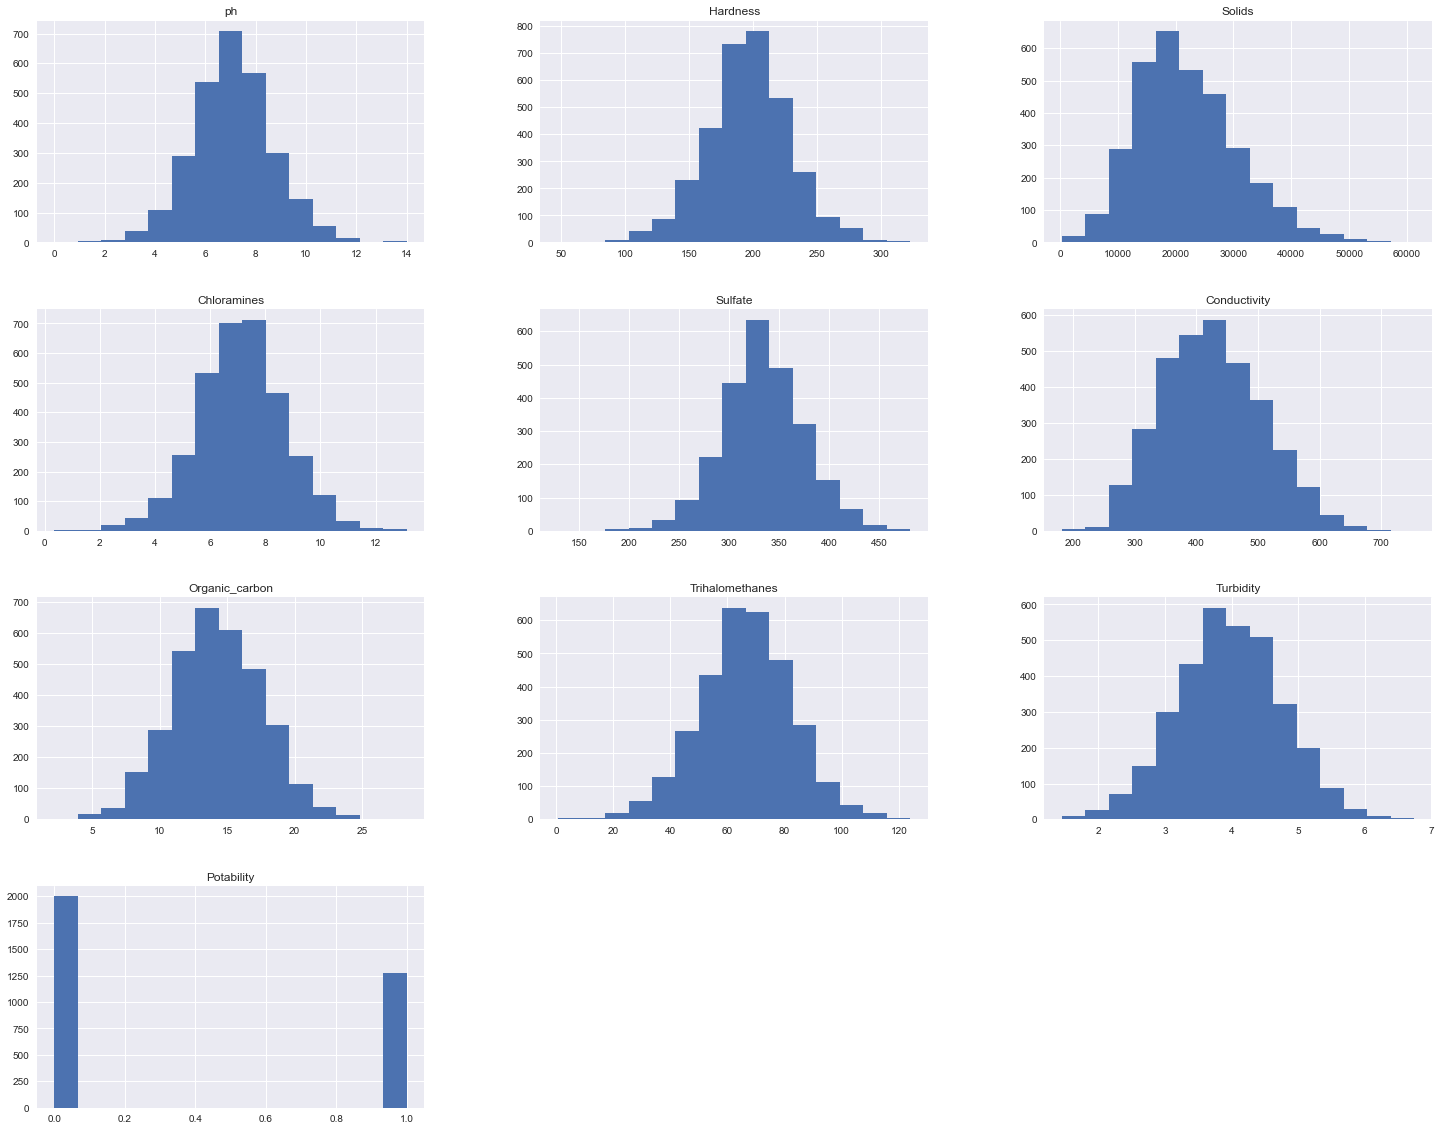

In [24]:
plt.style.use("seaborn")
df.hist(figsize=(25,20), bins=15)

In [13]:
df["Potability"].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

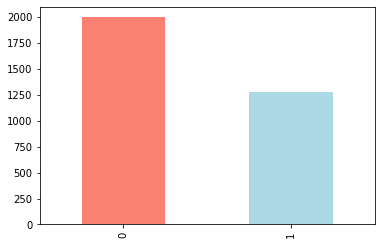

In [14]:
df["Potability"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

0    1998
1    1278
Name: Potability, dtype: int64


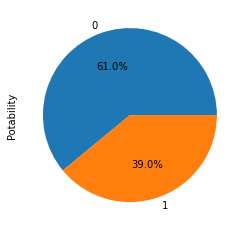

In [15]:
df['Potability'].value_counts().plot(kind='pie',autopct='%1.1f%%')
print(df['Potability'].value_counts())

In [16]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [26]:
df["ph"]=df["ph"].fillna(df["ph"].mean())
df["Sulfate"]=df["Sulfate"].fillna(df["Sulfate"].mean())
df["Trihalomethanes"]=df["Trihalomethanes"].fillna(df["Trihalomethanes"].mean())

In [27]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

<AxesSubplot:>

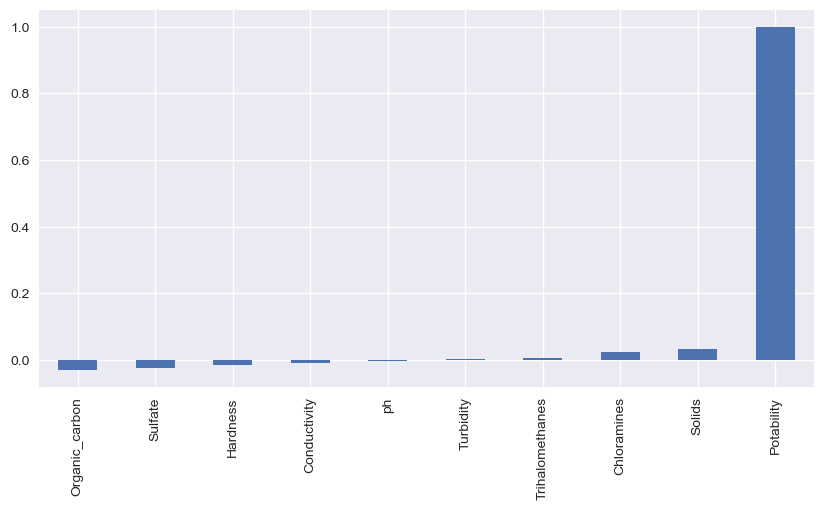

In [25]:
plt.figure(figsize=(10,5),dpi=100)
df.corr()['Potability'].sort_values().plot(kind='bar')

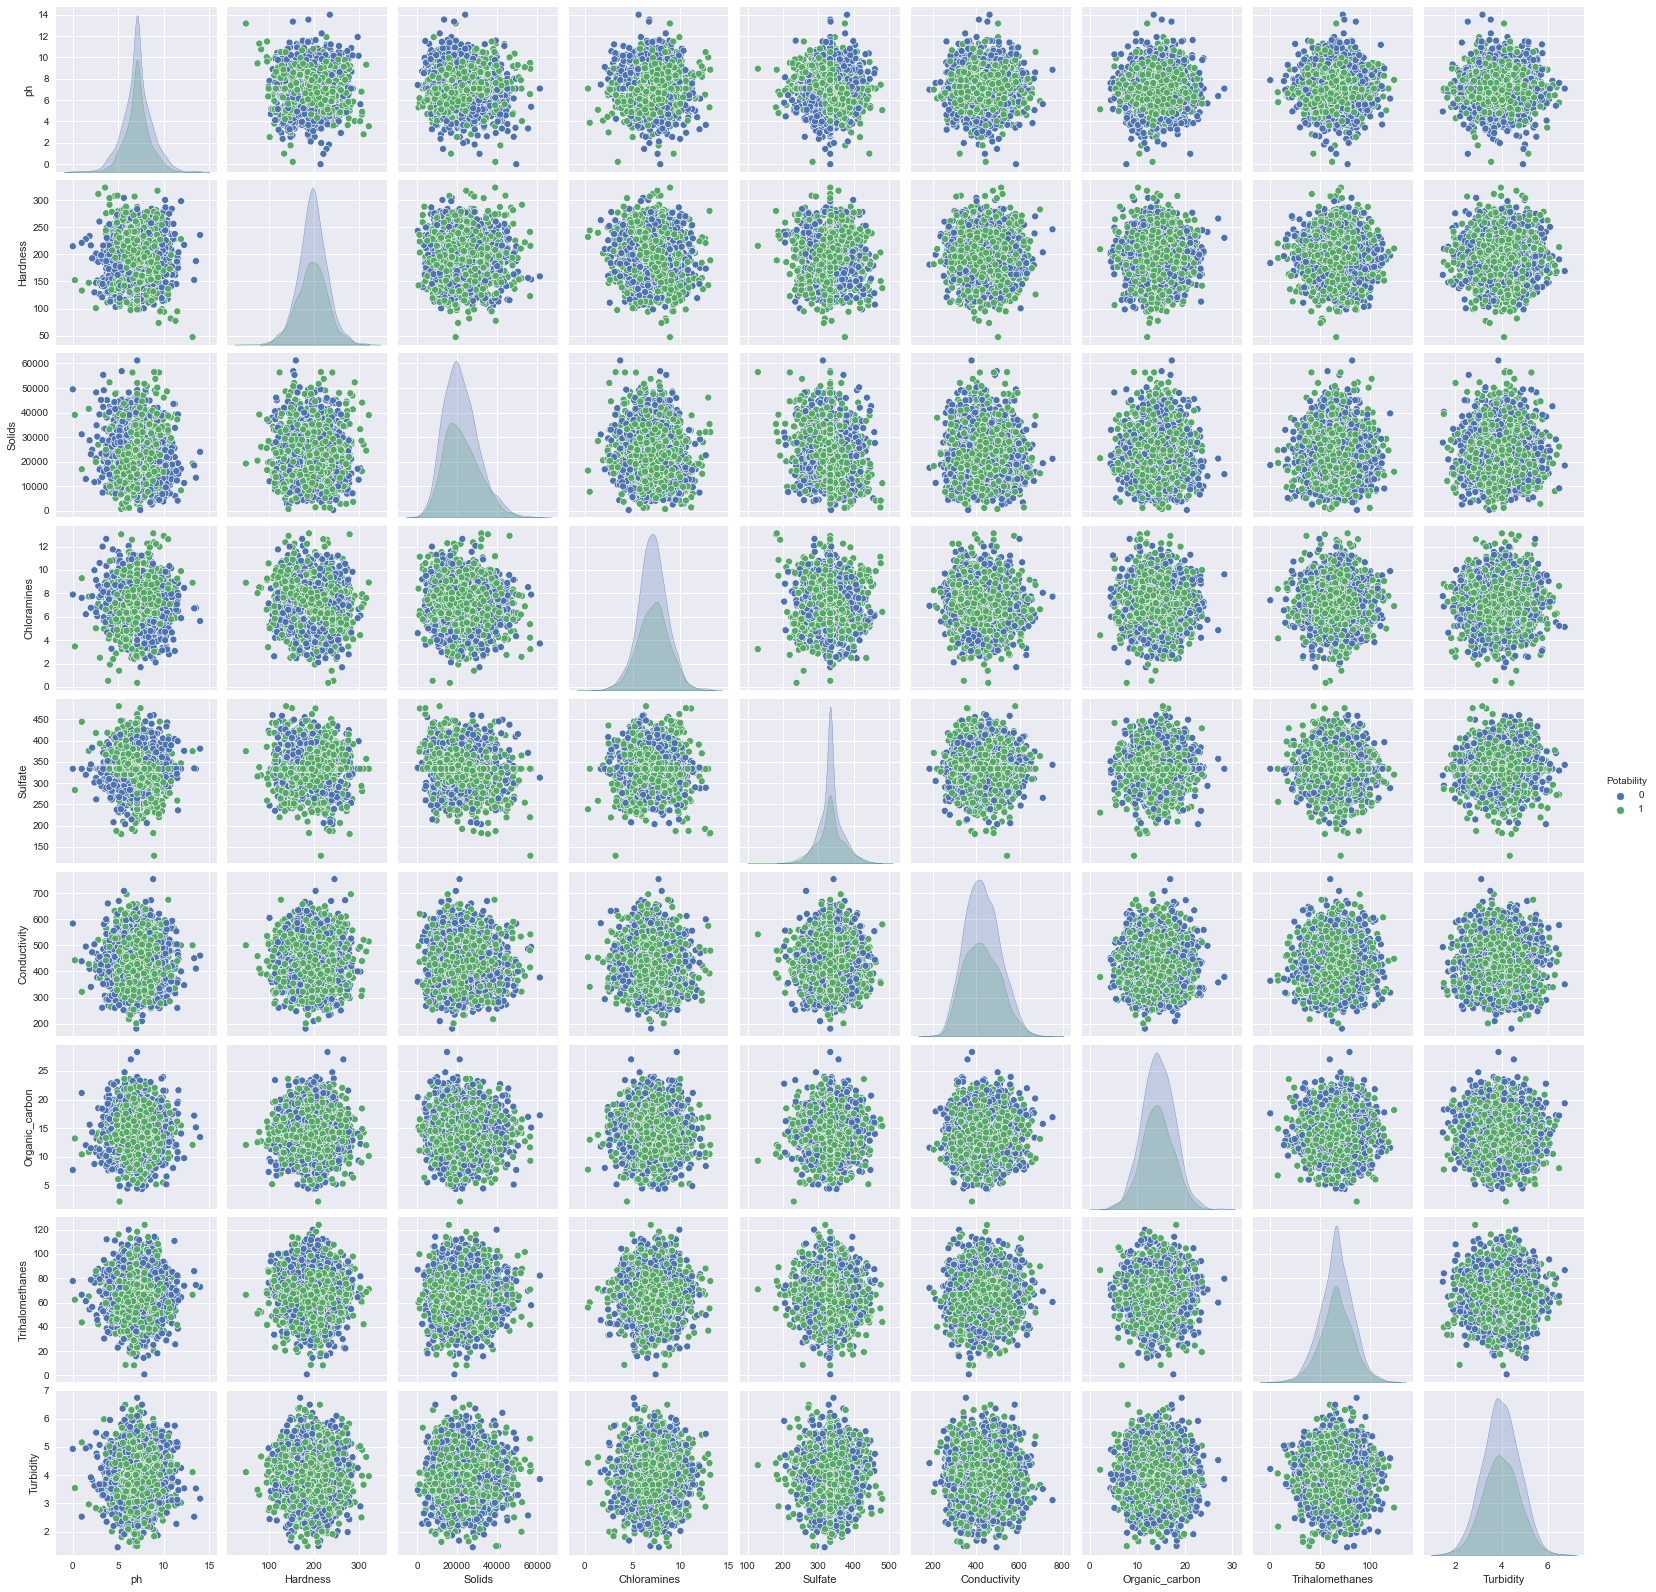

In [31]:
sns.pairplot(data=df,hue="Potability")

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


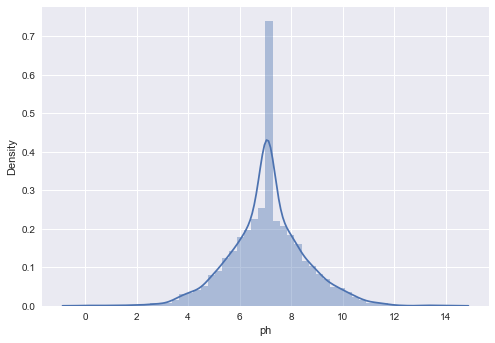

In [33]:
sns.distplot(df["ph"])
plt.show()

In [19]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


(10.5, -0.5)

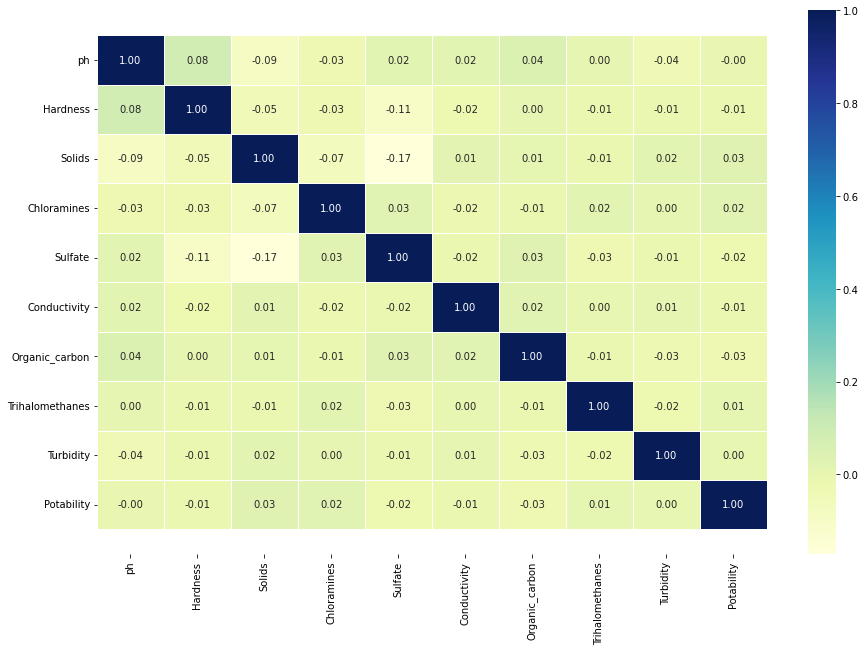

In [23]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Modeling